In [ ]:
import pandas as pd

# Read CSV from Google Drive
df = pd.read_csv("/content/machine_downtime_clean (1).csv")

In [ ]:
# Describe entire dataset
print(df.describe())

       Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
count              2500.000000            2500.000000   
mean                101.003447               4.909461   
std                  30.899151               1.082505   
min                 -14.326454               0.000000   
25%                  76.185000               4.451652   
50%                  96.508077               4.925774   
75%                 126.301071               5.512482   
max                 191.000000              11.350000   

       Air_System_Pressure(bar)  Coolant_Temperature  \
count               2500.000000          2500.000000   
mean                   6.455080            18.470800   
std                    0.670928             8.629826   
min                    0.000000             0.000000   
25%                    6.210732            10.175000   
50%                    6.502981            21.100000   
75%                    6.779330            25.600000   
max                    7.973992       

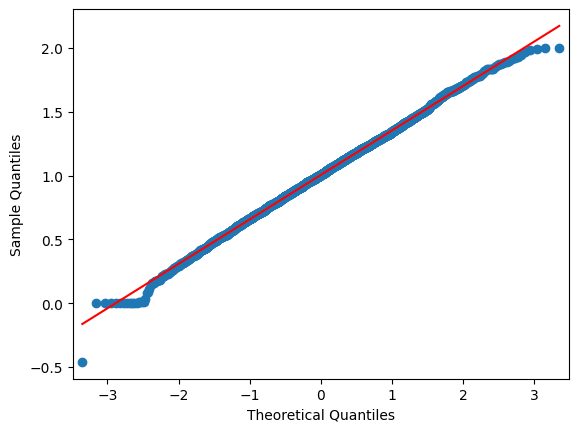

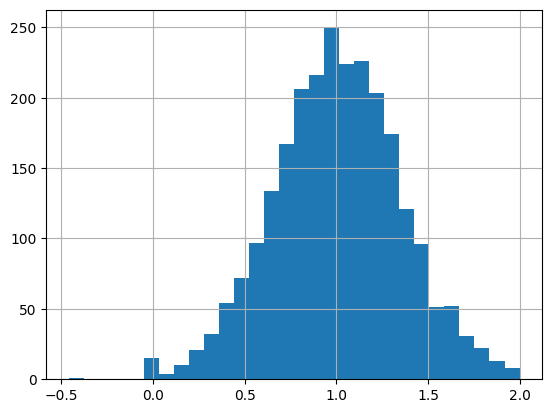

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

col = 'Spindle_Vibration(µm)'   # replace with column name
sm.qqplot(df[col], line='s')
plt.show()

df[col].hist(bins=30)
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

for col in df.select_dtypes(include='number').columns:
    data = df[col].dropna()
    print(f"{col} → Skew={skew(data):.2f}, Kurtosis={kurtosis(data):.2f}")


Hydraulic_Pressure(bar) → Skew=0.08, Kurtosis=-0.62
Coolant_Pressure(bar) → Skew=-0.51, Kurtosis=3.22
Air_System_Pressure(bar) → Skew=-6.00, Kurtosis=55.72
Coolant_Temperature → Skew=0.09, Kurtosis=1.49
Hydraulic_Oil_Temperature(°C) → Skew=-4.37, Kurtosis=37.17
Spindle_Bearing_Temperature(°C) → Skew=-1.60, Kurtosis=12.49
Spindle_Vibration(µm) → Skew=-0.07, Kurtosis=0.08
Tool_Vibration(µm) → Skew=-0.25, Kurtosis=0.57
Spindle_Speed(RPM) → Skew=-0.44, Kurtosis=2.43
Voltage(volts) → Skew=-0.87, Kurtosis=5.65
Torque(Nm) → Skew=-0.36, Kurtosis=0.78
Cutting(kN) → Skew=-0.10, Kurtosis=-0.24


In [ ]:
from scipy.stats import shapiro, normaltest

for col in df.select_dtypes(include='number').columns:
    data = df[col].dropna()

    stat, p = shapiro(data)
    print(f"{col} - Shapiro p={p:.3f} --> {'Normal' if p>0.05 else 'Not Normal'}")

    stat, p = normaltest(data)
    print(f"{col} - D’Agostino p={p:.3f} --> {'Normal' if p>0.05 else 'Not Normal'}\n")


Hydraulic_Pressure(bar) - Shapiro p=0.000 --> Not Normal
Hydraulic_Pressure(bar) - D’Agostino p=0.000 --> Not Normal

Coolant_Pressure(bar) - Shapiro p=0.000 --> Not Normal
Coolant_Pressure(bar) - D’Agostino p=0.000 --> Not Normal

Air_System_Pressure(bar) - Shapiro p=0.000 --> Not Normal
Air_System_Pressure(bar) - D’Agostino p=0.000 --> Not Normal

Coolant_Temperature - Shapiro p=0.000 --> Not Normal
Coolant_Temperature - D’Agostino p=0.000 --> Not Normal

Hydraulic_Oil_Temperature(°C) - Shapiro p=0.000 --> Not Normal
Hydraulic_Oil_Temperature(°C) - D’Agostino p=0.000 --> Not Normal

Spindle_Bearing_Temperature(°C) - Shapiro p=0.000 --> Not Normal
Spindle_Bearing_Temperature(°C) - D’Agostino p=0.000 --> Not Normal

Spindle_Vibration(µm) - Shapiro p=0.051 --> Normal
Spindle_Vibration(µm) - D’Agostino p=0.266 --> Normal

Tool_Vibration(µm) - Shapiro p=0.000 --> Not Normal
Tool_Vibration(µm) - D’Agostino p=0.000 --> Not Normal

Spindle_Speed(RPM) - Shapiro p=0.000 --> Not Normal
Spindle_

In [ ]:
#my data is normal or non normal how to check



In [ ]:
print(df.shape)      # Rows & columns
print(df.head())     # First few rows
print(df.info())     # Data types & nulls


(2500, 16)
         Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  2021-12-31  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  2022-03-31  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_T

In [ ]:
df.dropna(how="all", inplace=True)
 # Drops rows where *all* column values are NaN (missing); inplace=True updates df directly

In [ ]:
df.columns = df.columns.str.strip() # Removes any leading/trailing spaces from column names in the DataFrame


In [ ]:
import numpy as np # Import NumPy library (used for numerical operations, provides NaN representation)
df = df.replace(r'^\s*$', np.nan, regex=True) # Replace empty strings or strings with only spaces with NaN (missing values)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert 'Date' column to datetime format; invalid dates become NaT (Not a Time)
df['Torque(Nm)'] = pd.to_numeric(df['Torque(Nm)'], errors='coerce')# Convert 'Torque(Nm)' column to numeric; invalid entries become NaN

In [ ]:
# Option 1: Drop rows with missing Machine_ID
df = df.dropna(subset=['Machine_ID'])

# Option 2: Fill missing Torque_Nm with 0
df['Torque(Nm)'] = df['Torque(Nm)'].fillna(0)

In [ ]:
print(df.shape)      # Rows & columns
print(df.head())     # First few rows
print(df.info())     # Data types & nulls

(2500, 16)
        Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0 2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1 2021-12-31  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2 2021-12-31  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3 2022-05-31  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4 2022-03-31  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature(°C)  Spindle_Bearing_Tempera

Let's visualize the distributions of the numeric columns using histograms to understand the skewness and kurtosis.

In [ ]:
import numpy as np   # Import NumPy library (for numerical operations)

# Select only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the mean (average) for each numeric column
mean_values = df[numeric_cols].mean()

# Calculate the median (middle value) for each numeric column
median_values = df[numeric_cols].median()

# Calculate the mode (most frequent value) for each numeric column
# .mode() can return multiple modes, so we use .iloc[0] to pick the first one
mode_values = df[numeric_cols].mode().iloc[0]

# Print the results
print("Mean values:")
print(mean_values)

print("\nMedian values:")
print(median_values)

print("\nMode values:")
print(mode_values)


Mean values:
Hydraulic_Pressure(bar)              101.003447
Coolant_Pressure(bar)                  4.909461
Air_System_Pressure(bar)               6.455080
Coolant_Temperature                   18.470800
Hydraulic_Oil_Temperature(°C)         47.313560
Spindle_Bearing_Temperature(°C)       34.965520
Spindle_Vibration(µm)                  1.004893
Tool_Vibration(µm)                    25.300162
Spindle_Speed(RPM)                 20226.132800
Voltage(volts)                       348.159200
Torque(Nm)                            25.022994
Cutting(kN)                            2.774760
dtype: float64

Median values:
Hydraulic_Pressure(bar)               96.508077
Coolant_Pressure(bar)                  4.925774
Air_System_Pressure(bar)               6.502981
Coolant_Temperature                   21.100000
Hydraulic_Oil_Temperature(°C)         47.600000
Spindle_Bearing_Temperature(°C)       35.100000
Spindle_Vibration(µm)                  1.006000
Tool_Vibration(µm)                    25.418

In [ ]:
# Calculate variance, standard deviation, and range for numeric columns

variance_values = df[numeric_cols].var()   # Variance → how spread out the data is around the mean
std_dev_values = df[numeric_cols].std()    # Standard Deviation → square root of variance (spread in same units as data)
range_values = df[numeric_cols].max() - df[numeric_cols].min()   # Range → difference between max and min values

# Print the results
print("Variance values:")
print(variance_values)

print("\nStandard Deviation values:")
print(std_dev_values)

print("\nRange values:")
print(range_values)


Variance values:
Hydraulic_Pressure(bar)            9.547576e+02
Coolant_Pressure(bar)              1.171816e+00
Air_System_Pressure(bar)           4.501449e-01
Coolant_Temperature                7.447390e+01
Hydraulic_Oil_Temperature(°C)      2.853689e+01
Spindle_Bearing_Temperature(°C)    1.756842e+01
Spindle_Vibration(µm)              1.215261e-01
Tool_Vibration(µm)                 4.408441e+01
Spindle_Speed(RPM)                 1.579194e+07
Voltage(volts)                     2.345772e+03
Torque(Nm)                         4.267165e+01
Cutting(kN)                        4.008663e-01
dtype: float64

Standard Deviation values:
Hydraulic_Pressure(bar)              30.899151
Coolant_Pressure(bar)                 1.082505
Air_System_Pressure(bar)              0.670928
Coolant_Temperature                   8.629826
Hydraulic_Oil_Temperature(°C)         5.341993
Spindle_Bearing_Temperature(°C)       4.191470
Spindle_Vibration(µm)                 0.348606
Tool_Vibration(µm)                 

In [ ]:
# Calculate skewness and kurtosis for numeric columns

skewness_values = df[numeric_cols].skew()       # Skewness → measures asymmetry of the distribution
kurtosis_values = df[numeric_cols].kurtosis()   # Kurtosis → measures "tailedness" (outliers, heavy tails vs. flatness)

# Print the results
print("Skewness values:")
print(skewness_values)

print("\nKurtosis values:")
print(kurtosis_values)


Skewness values:
Hydraulic_Pressure(bar)            0.082739
Coolant_Pressure(bar)             -0.507772
Air_System_Pressure(bar)          -6.002350
Coolant_Temperature                0.088172
Hydraulic_Oil_Temperature(°C)     -4.367840
Spindle_Bearing_Temperature(°C)   -1.596803
Spindle_Vibration(µm)             -0.067221
Tool_Vibration(µm)                -0.251762
Spindle_Speed(RPM)                -0.439138
Voltage(volts)                    -0.870599
Torque(Nm)                        -0.362219
Cutting(kN)                       -0.096002
dtype: float64

Kurtosis values:
Hydraulic_Pressure(bar)            -0.618977
Coolant_Pressure(bar)               3.226909
Air_System_Pressure(bar)           55.836539
Coolant_Temperature                 1.491947
Hydraulic_Oil_Temperature(°C)      37.248048
Spindle_Bearing_Temperature(°C)    12.515509
Spindle_Vibration(µm)               0.083895
Tool_Vibration(µm)                  0.572129
Spindle_Speed(RPM)                  2.436925
Voltage(volts)   

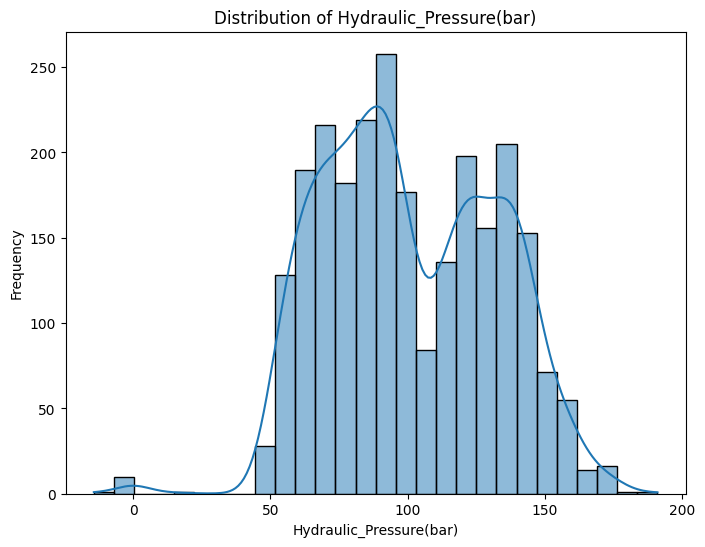

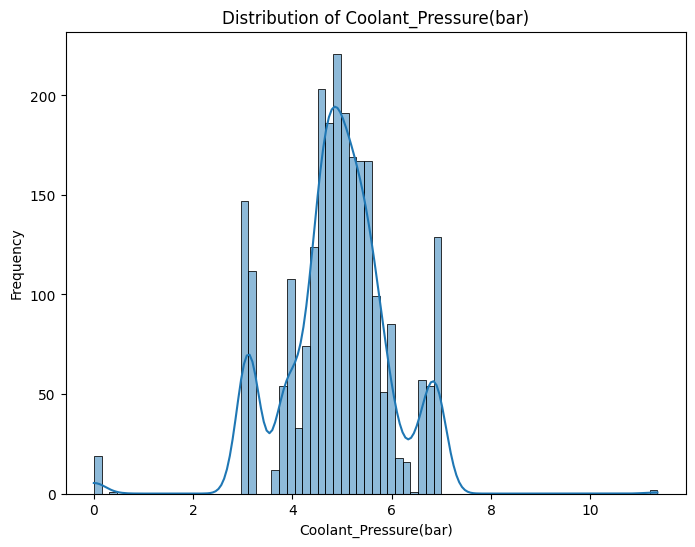

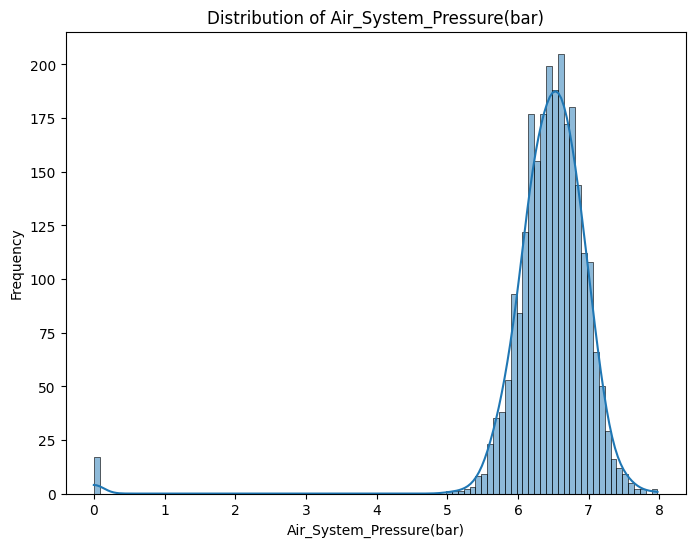

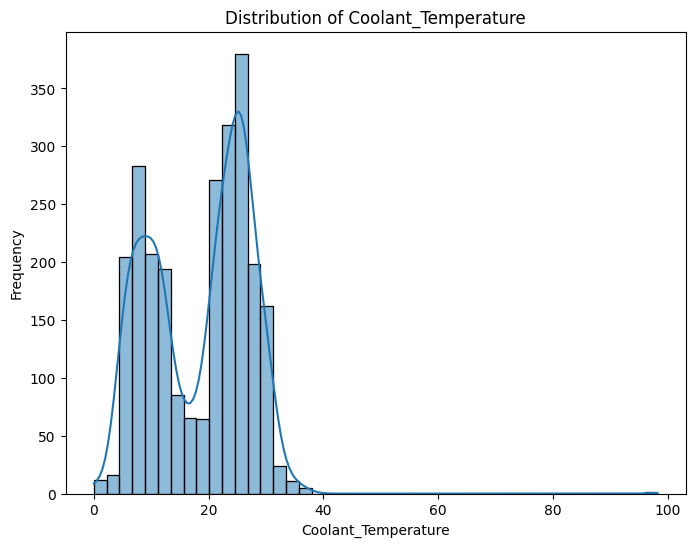

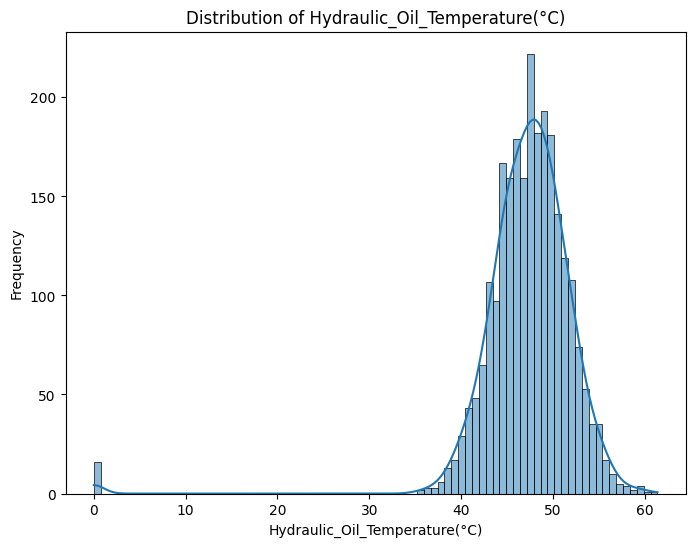

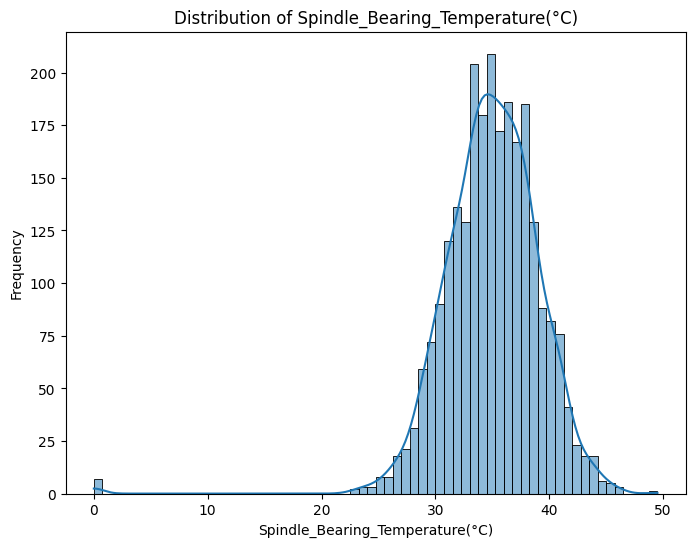

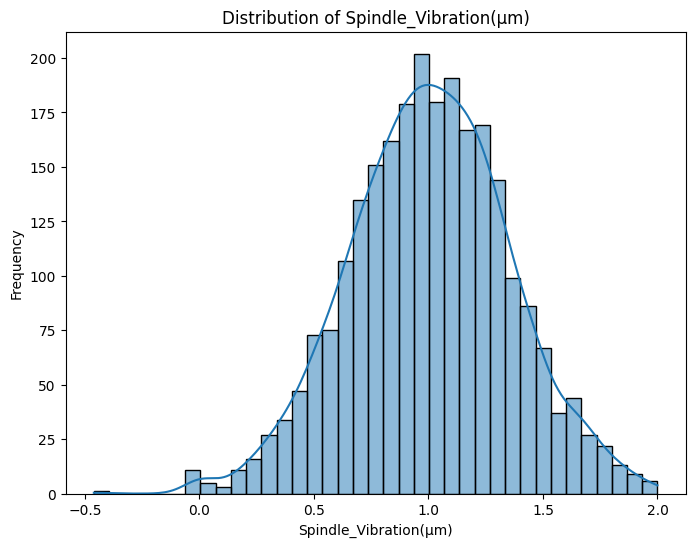

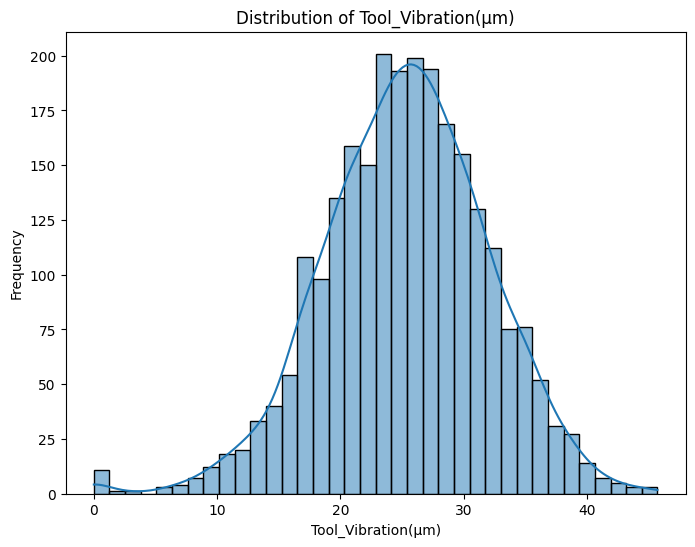

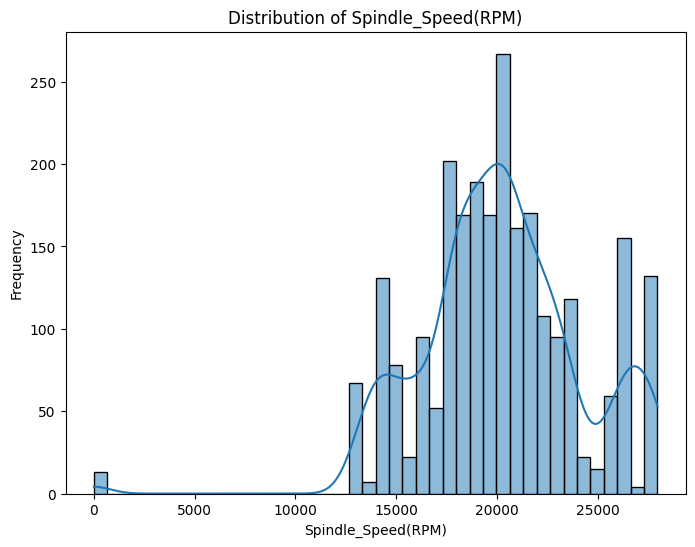

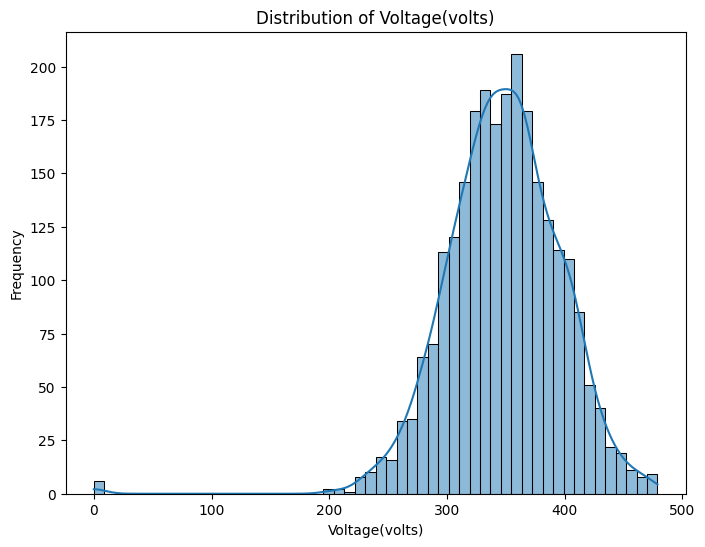

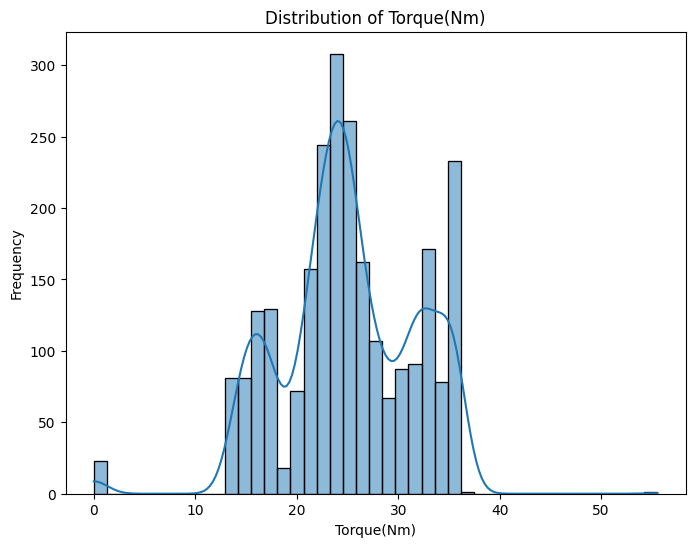

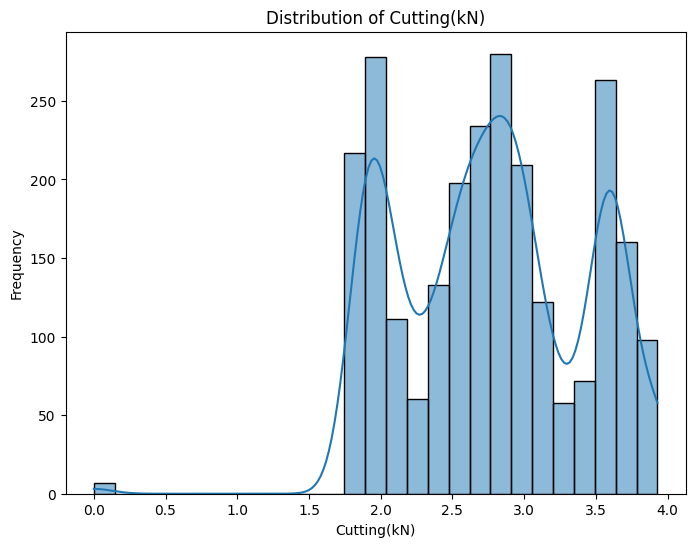

In [ ]:
import matplotlib.pyplot as plt     # Import matplotlib for plotting
import seaborn as sns              # Import seaborn for statistical plots

# Loop through each numeric column in the DataFrame
for col in numeric_cols:
    plt.figure(figsize=(8, 6))                         # Set figure size
    sns.histplot(data=df, x=col, kde=True)             # Plot histogram with KDE (smoothed curve)
    plt.title(f'Distribution of {col}')                # Add plot title
    plt.xlabel(col)                                    # Label x-axis with column name
    plt.ylabel('Frequency')                            # Label y-axis as frequency
    plt.show()                                         # Display the plot


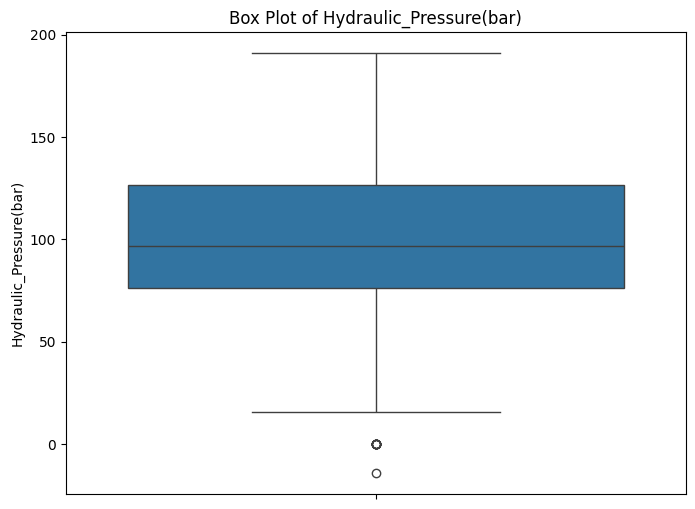

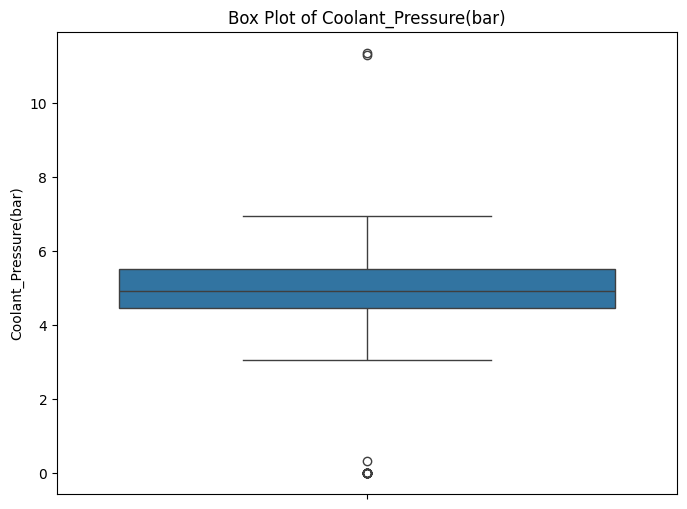

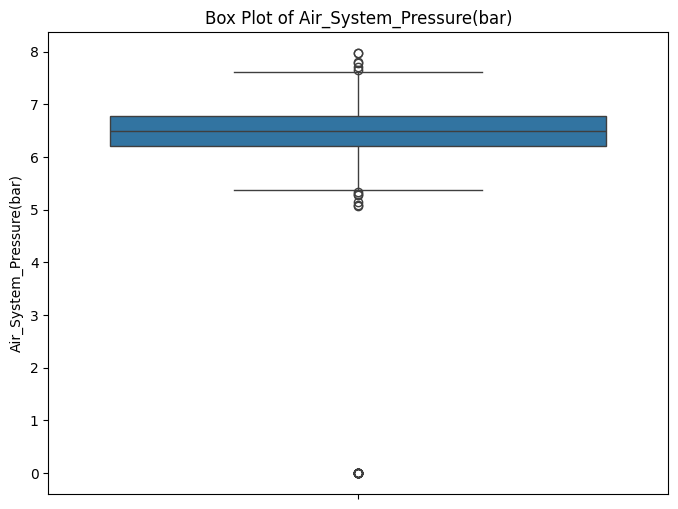

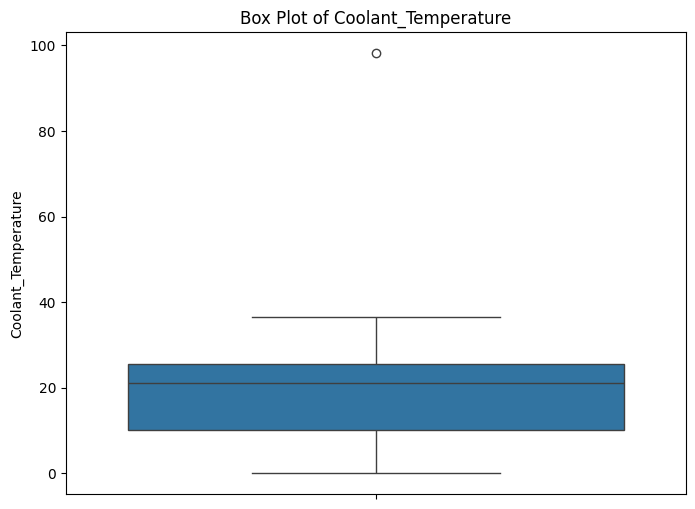

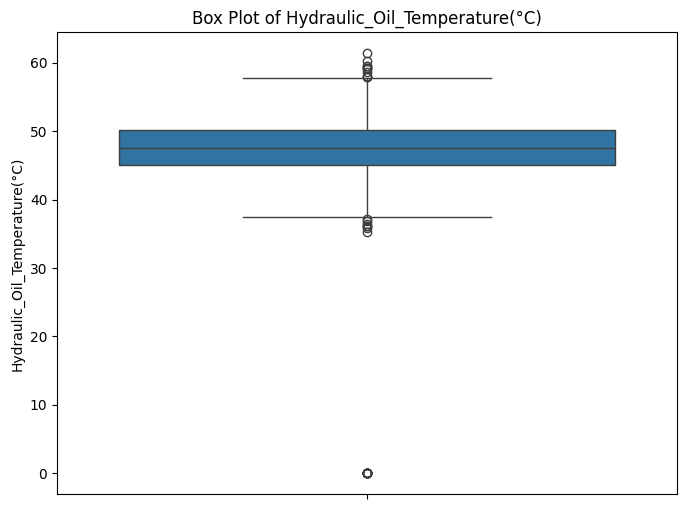

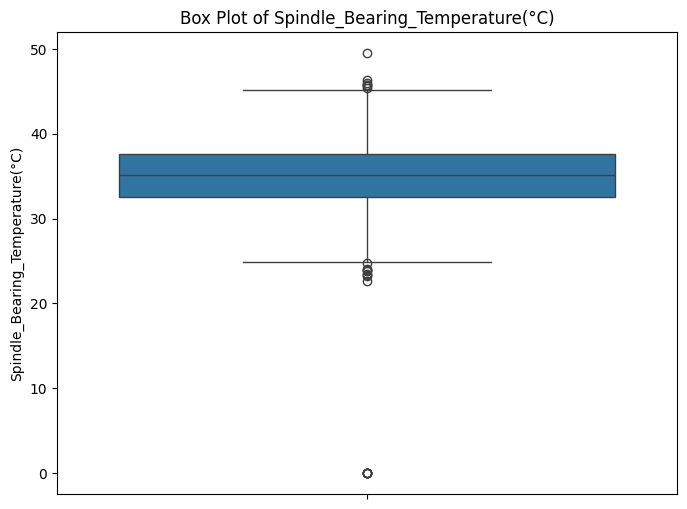

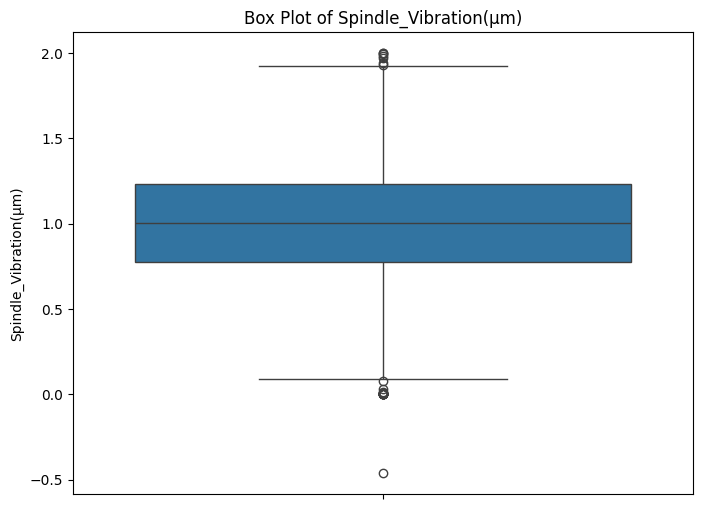

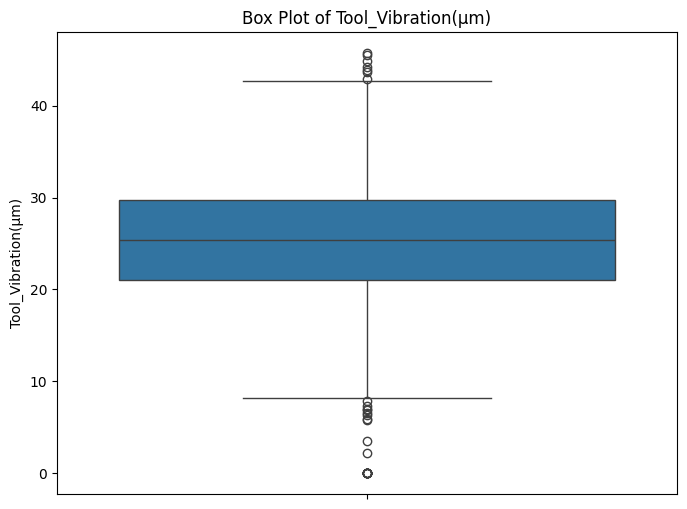

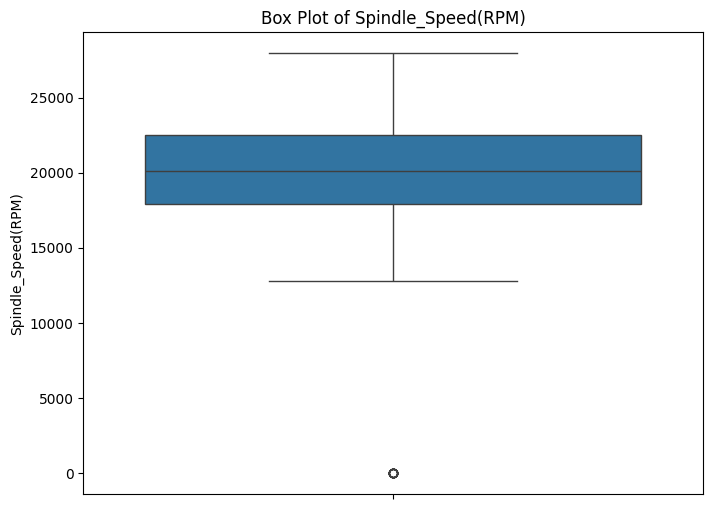

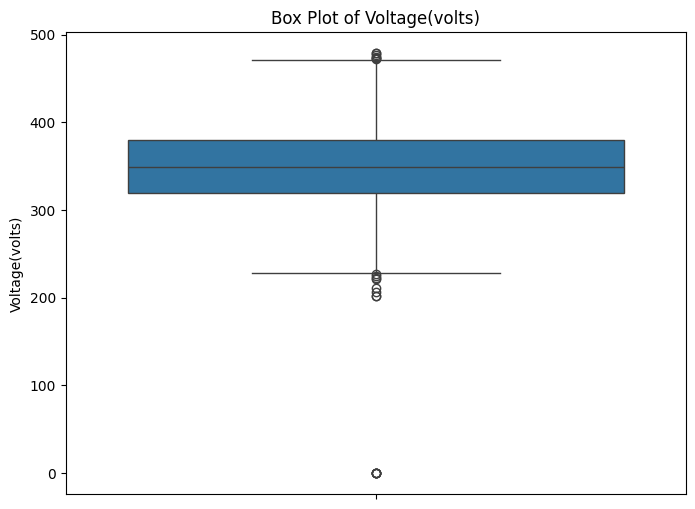

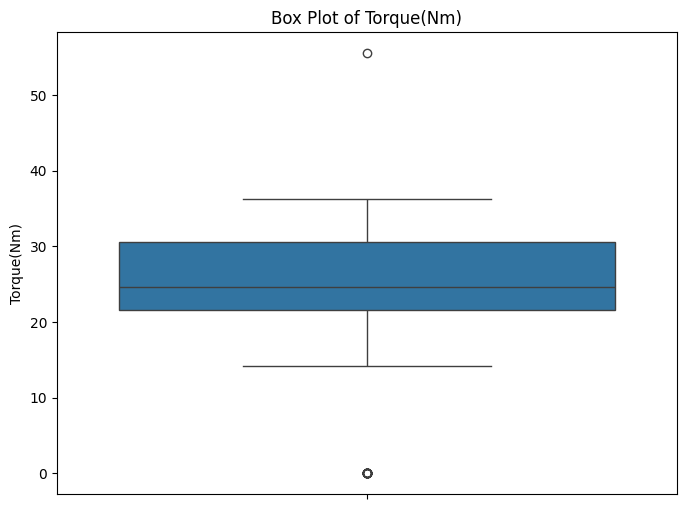

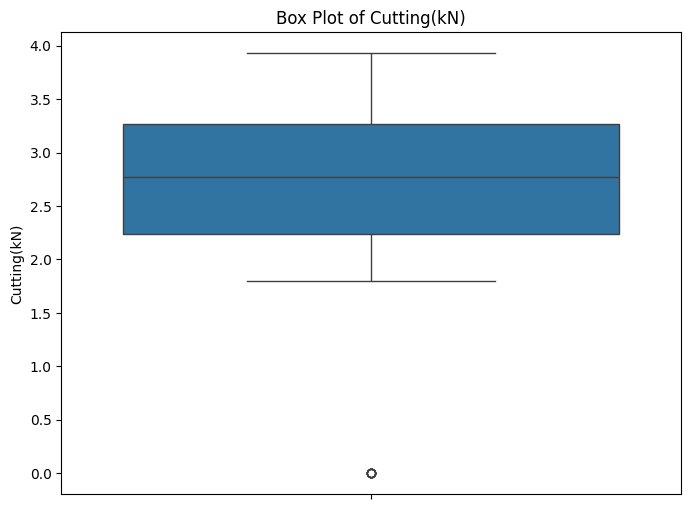

In [ ]:
# Plot box plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

<Figure size 800x600 with 0 Axes>

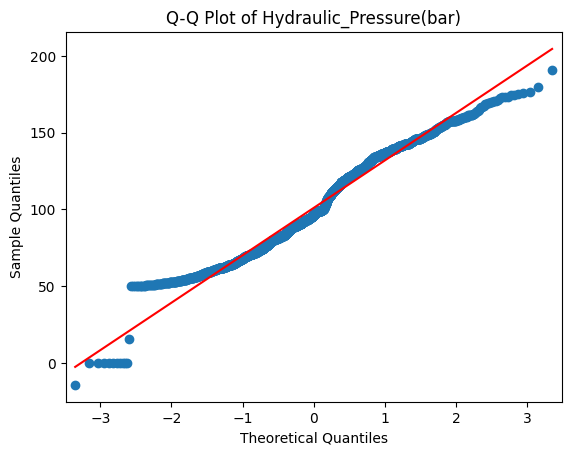

<Figure size 800x600 with 0 Axes>

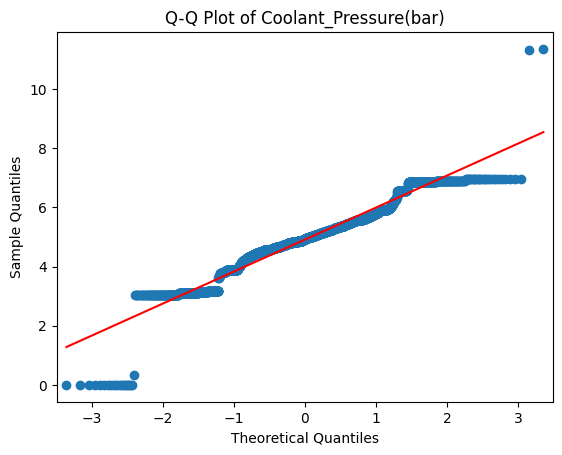

<Figure size 800x600 with 0 Axes>

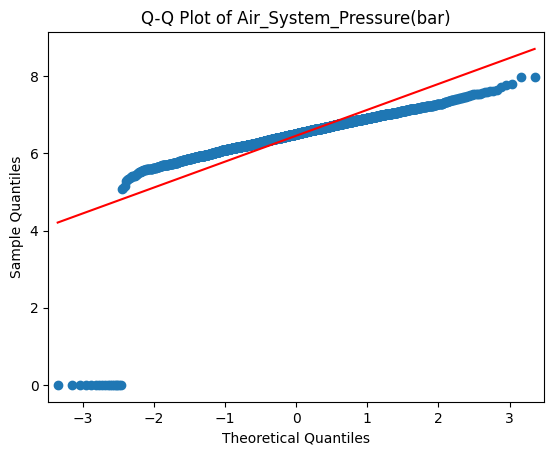

<Figure size 800x600 with 0 Axes>

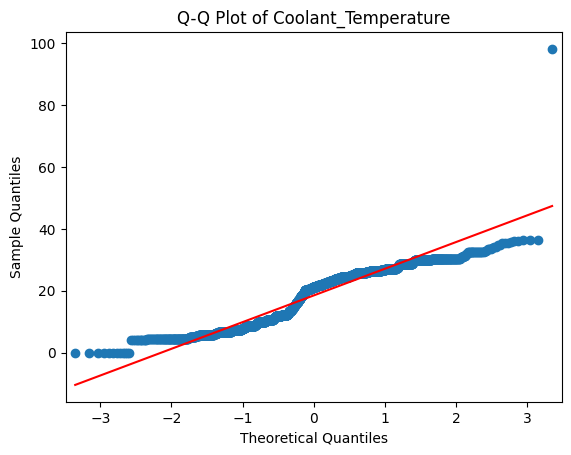

<Figure size 800x600 with 0 Axes>

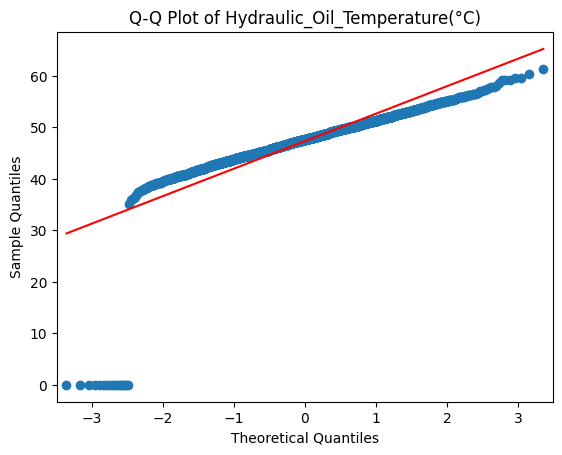

<Figure size 800x600 with 0 Axes>

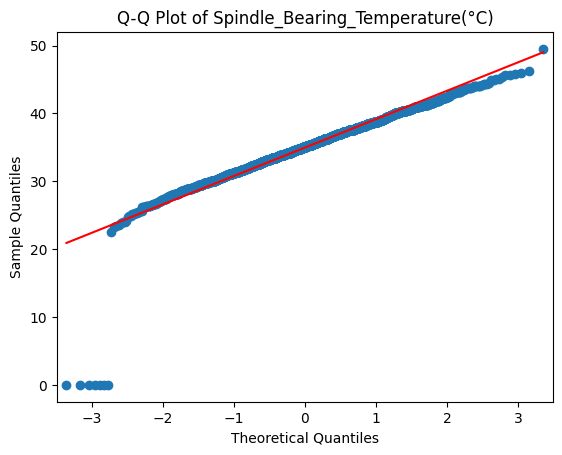

<Figure size 800x600 with 0 Axes>

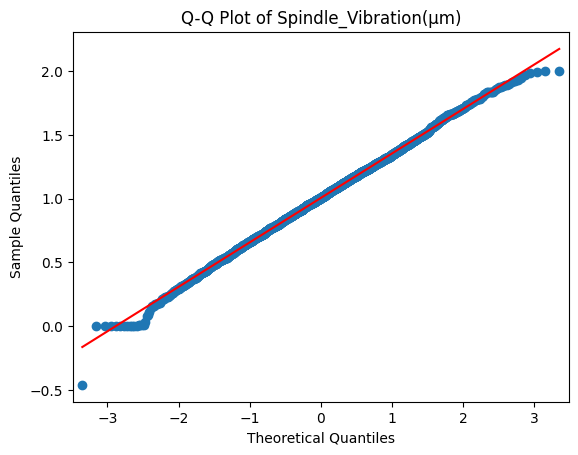

<Figure size 800x600 with 0 Axes>

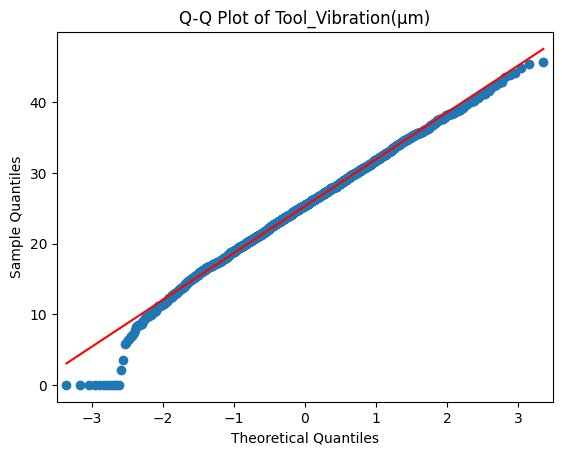

<Figure size 800x600 with 0 Axes>

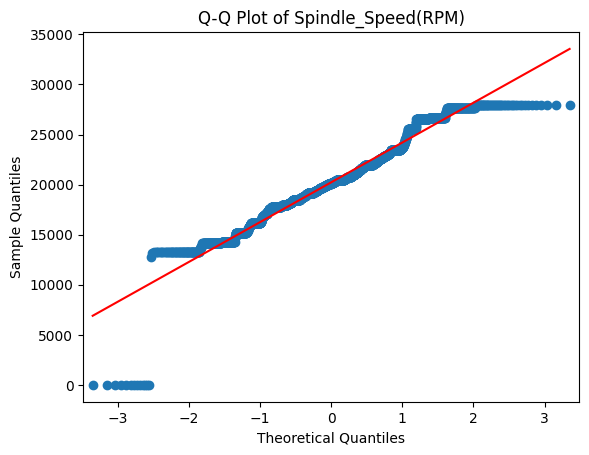

<Figure size 800x600 with 0 Axes>

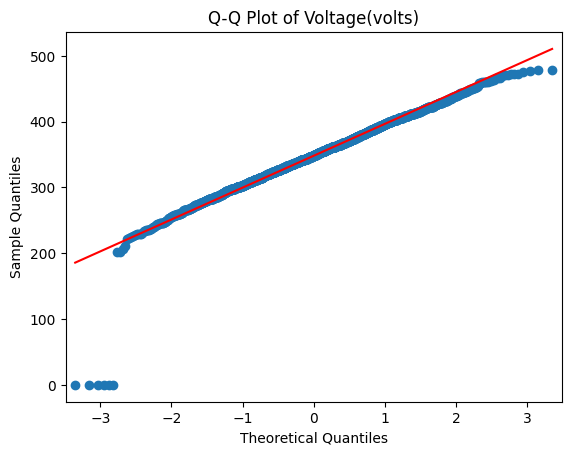

<Figure size 800x600 with 0 Axes>

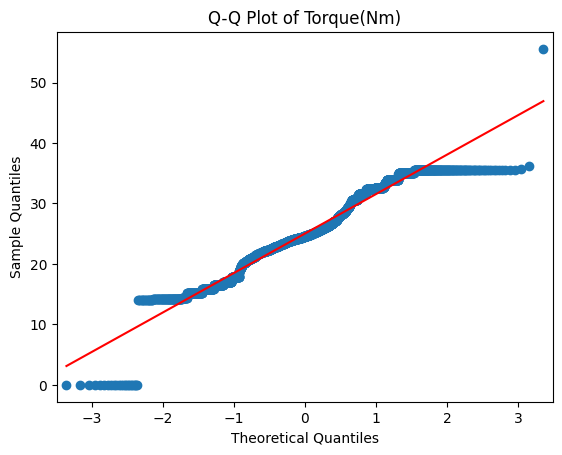

<Figure size 800x600 with 0 Axes>

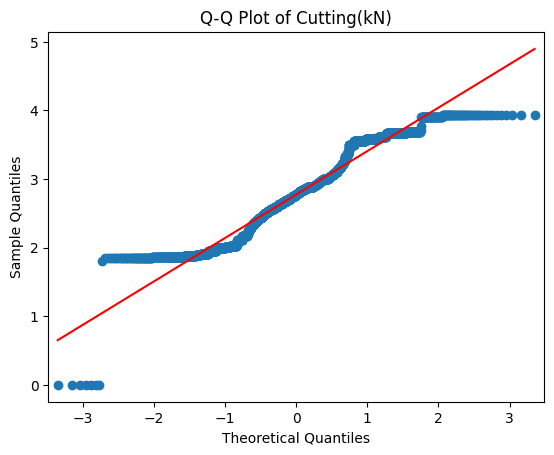

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Identify numeric columns (assuming df is now loaded)
import numpy as np
numeric_cols = df.select_dtypes(include=np.number).columns

# Create Q-Q plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sm.qqplot(df[col], line='s') # 's' - standardized line
    plt.title(f'Q-Q Plot of {col}')
    plt.show()

# Task
Analyze the provided CSV file "Machine_Data.csv" to determine if the 'Downtime' column is normally distributed. If not, explain why and provide steps to handle the non-normality and outliers. Additionally, explore relationships between variables and prepare the data for potential modeling.

## Review non-normal distributions and outliers

### Subtask:
Revisit the histograms, box plots, and Q-Q plots for the non-normally distributed columns to understand the nature of their distributions and the extent of outliers.


## Consider data transformations

### Subtask:
Based on the visualizations, apply appropriate transformations (like log or Box-Cox) to some of the highly skewed numerical columns if necessary for downstream analysis that assumes normality.


**Reasoning**:
Identify the highly skewed columns based on the skewness values and visualizations, and apply Box-Cox transformation to those with positive values to attempt to normalize their distributions.



In [ ]:
from scipy.stats import boxcox

# Identify highly skewed numeric columns based on previous analysis (skewness values and visualizations)
# A common threshold for high skewness is |skewness| > 1
skewed_cols = ['Air_System_Pressure(bar)', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)', 'Voltage(volts)'] # Based on previous skewness values

# Apply Box-Cox transformation to the skewed columns that contain only positive values
for col in skewed_cols:
    # Box-Cox requires positive data, check if min value is > 0
    if df[col].min() > 0:
        df[col + '_boxcox'], _ = boxcox(df[col])
        print(f"Applied Box-Cox transformation to {col}")
    else:
        print(f"Skipping Box-Cox for {col} as it contains non-positive values.")

# Apply log transformation to skewed columns that contain zero or negative values if necessary
# In this case, we will check for columns with min value <= 0 that are skewed
log_transform_cols = ['Coolant_Pressure(bar)', 'Spindle_Speed(RPM)', 'Torque(Nm)', 'Cutting(kN)'] # Based on previous skewness and min values

for col in log_transform_cols:
    # Add a small constant to handle zero values before log transformation
    df[col + '_log'] = np.log1p(df[col])
    print(f"Applied log transformation to {col}")

# Display the first few rows with the new transformed columns
display(df.head())

Skipping Box-Cox for Air_System_Pressure(bar) as it contains non-positive values.
Skipping Box-Cox for Hydraulic_Oil_Temperature(°C) as it contains non-positive values.
Skipping Box-Cox for Spindle_Bearing_Temperature(°C) as it contains non-positive values.
Skipping Box-Cox for Voltage(volts) as it contains non-positive values.
Applied log transformation to Coolant_Pressure(bar)
Applied log transformation to Spindle_Speed(RPM)
Applied log transformation to Torque(Nm)
Applied log transformation to Cutting(kN)


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,Coolant_Pressure(bar)_log,Spindle_Speed(RPM)_log,Torque(Nm)_log,Cutting(kN)_log
0,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892,335,24.055326,3.58,Machine_Failure,2.071123,10.161728,3.221086,1.521699
1,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856,368,14.202890,2.68,Machine_Failure,1.781186,9.896312,2.721486,1.302913
2,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851,325,24.049267,3.55,Machine_Failure,2.059164,9.896060,3.220845,1.515127
3,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461,360,25.860029,3.55,Machine_Failure,1.718181,9.823470,3.290639,1.515127
4,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526,354,25.515874,3.55,Machine_Failure,2.065999,10.185918,3.277744,1.515127


**Reasoning**:
Re-evaluate the distributions of the transformed columns using histograms and Q-Q plots to assess the effectiveness of the transformations.



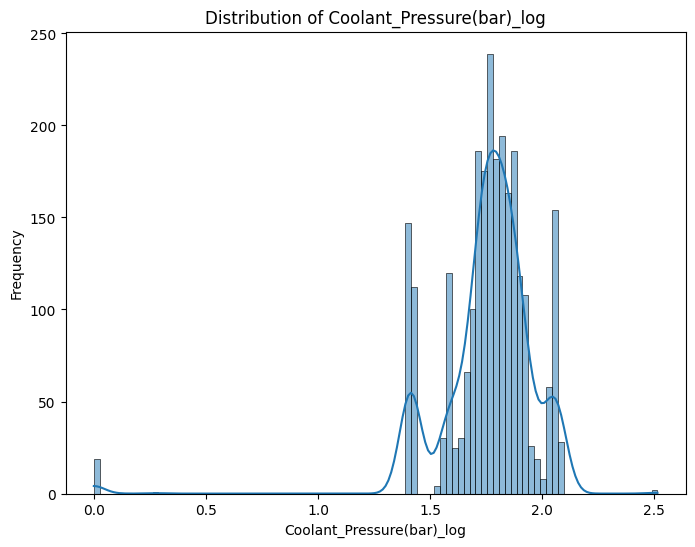

<Figure size 800x600 with 0 Axes>

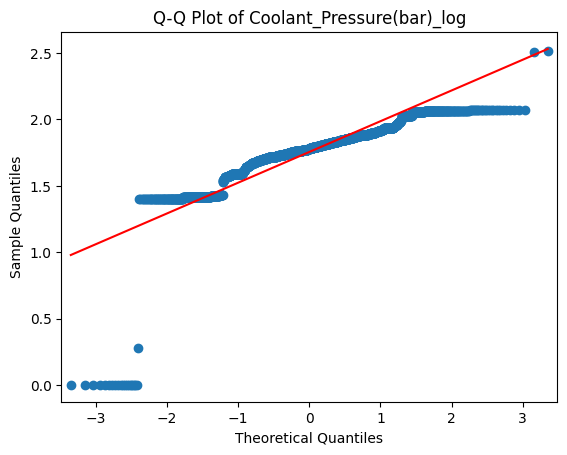

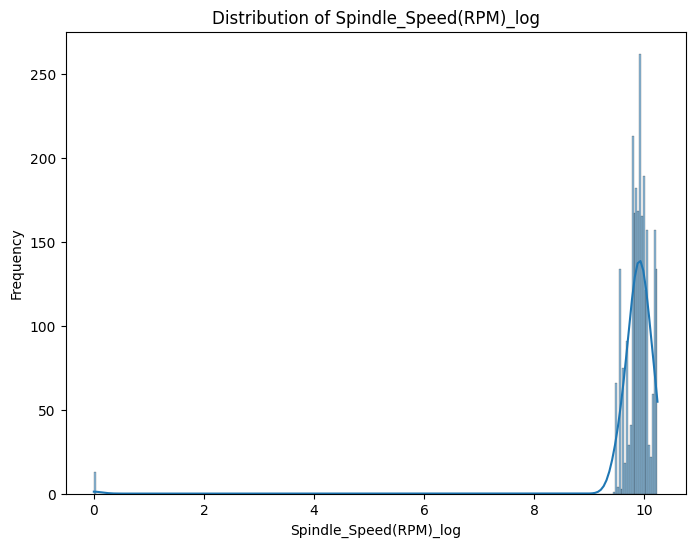

<Figure size 800x600 with 0 Axes>

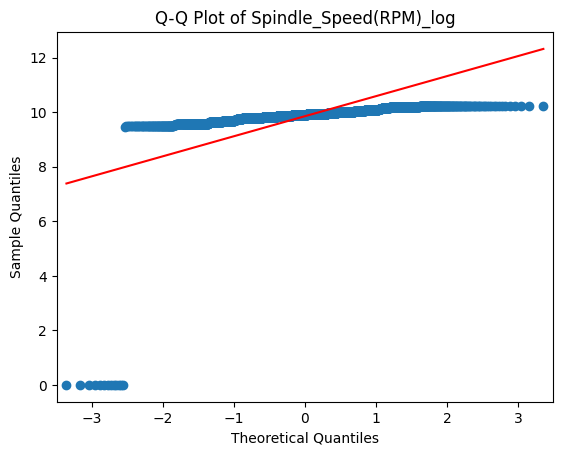

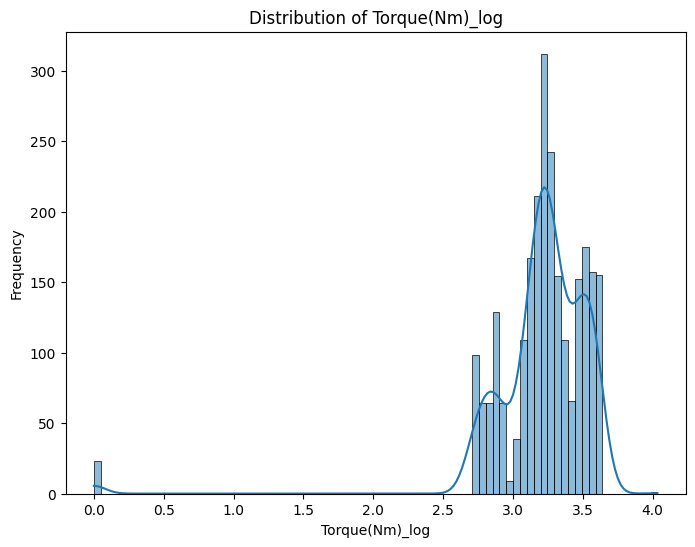

<Figure size 800x600 with 0 Axes>

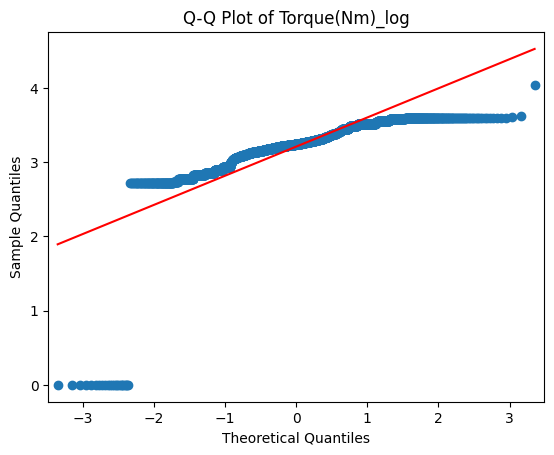

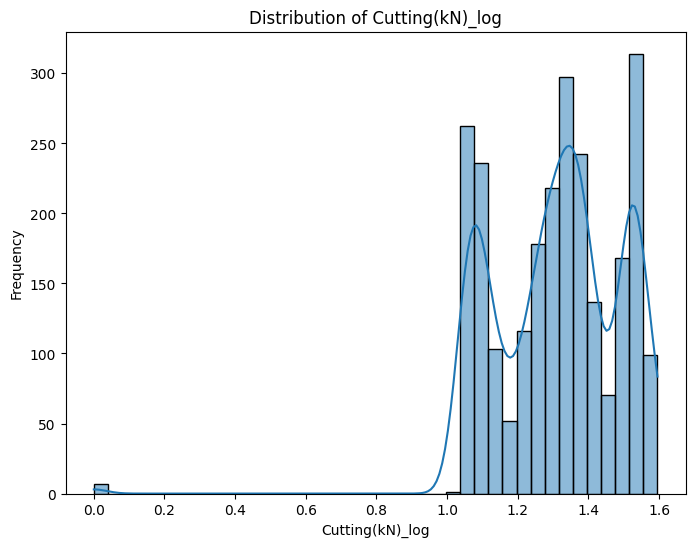

<Figure size 800x600 with 0 Axes>

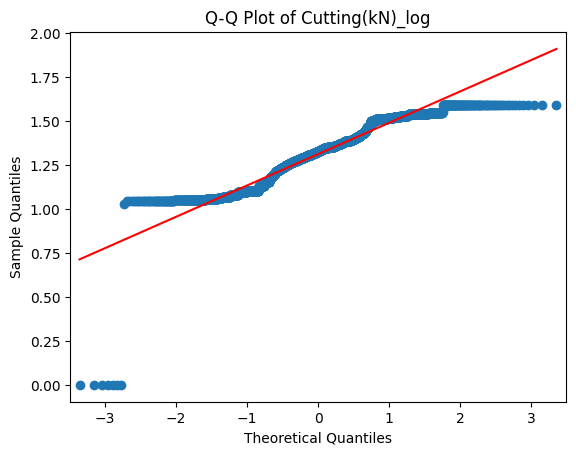

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# List of transformed columns
transformed_cols = ['Coolant_Pressure(bar)_log', 'Spindle_Speed(RPM)_log', 'Torque(Nm)_log', 'Cutting(kN)_log']

# Plot histograms and Q-Q plots for transformed columns
for col in transformed_cols:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(8, 6))
    sm.qqplot(df[col], line='s')
    plt.title(f'Q-Q Plot of {col}')
    plt.show()

## Handle outliers

### Subtask:
Decide on a strategy for handling outliers (e.g., capping, removing, or transforming) based on the context of the data and the goals of the analysis.


**Reasoning**:
Review the box plots to identify columns with outliers and then apply capping to the identified columns based on the 99th percentile to handle extreme values while retaining most of the data.



Capped outliers in Hydraulic_Pressure(bar) at 50.61 and 163.97
Capped outliers in Coolant_Pressure(bar) at 3.05 and 6.96
Capped outliers in Air_System_Pressure(bar) at 5.40 and 7.44
Capped outliers in Coolant_Temperature at 4.40 and 32.60
Capped outliers in Hydraulic_Oil_Temperature(°C) at 37.60 and 56.30
Capped outliers in Spindle_Bearing_Temperature(°C) at 25.60 and 43.70
Capped outliers in Spindle_Vibration(µm) at 0.17 and 1.82
Capped outliers in Tool_Vibration(µm) at 8.53 and 40.07
Capped outliers in Spindle_Speed(RPM) at 13272.00 and 27957.00
Capped outliers in Voltage(volts) at 236.00 and 454.04
Capped outliers in Torque(Nm) at 14.11 and 35.58
Capped outliers in Cutting(kN) at 1.85 and 3.93


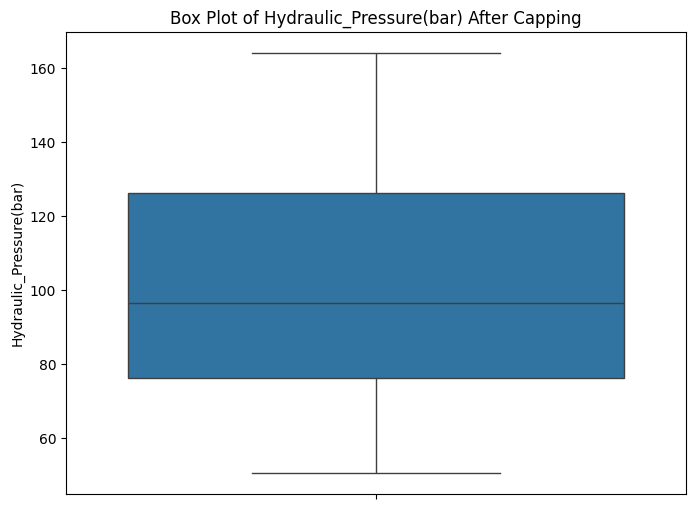

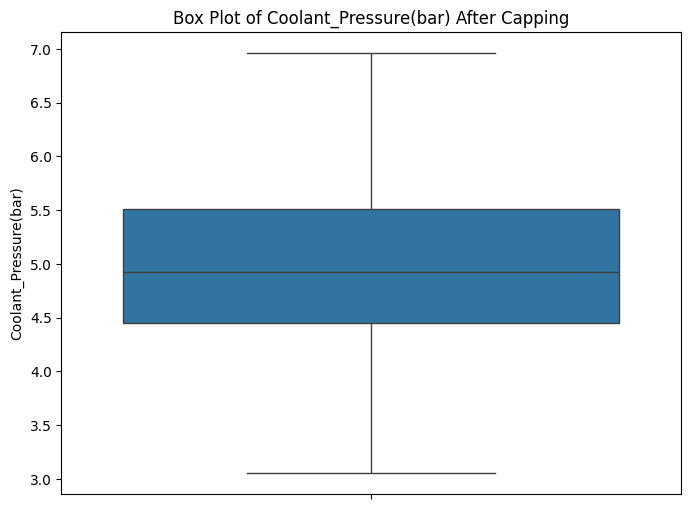

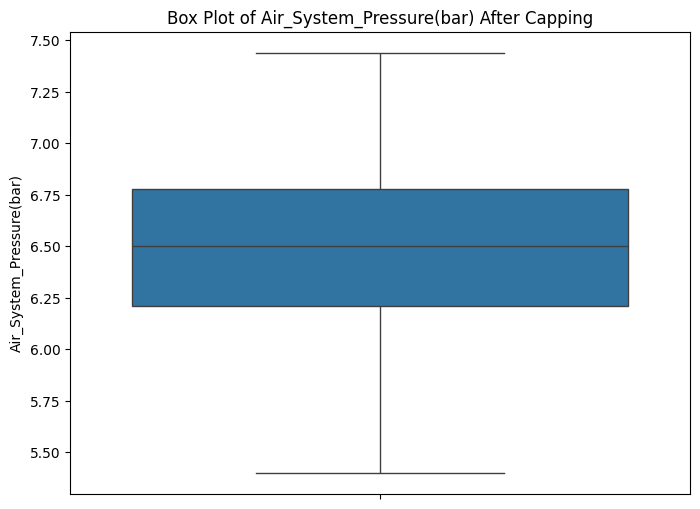

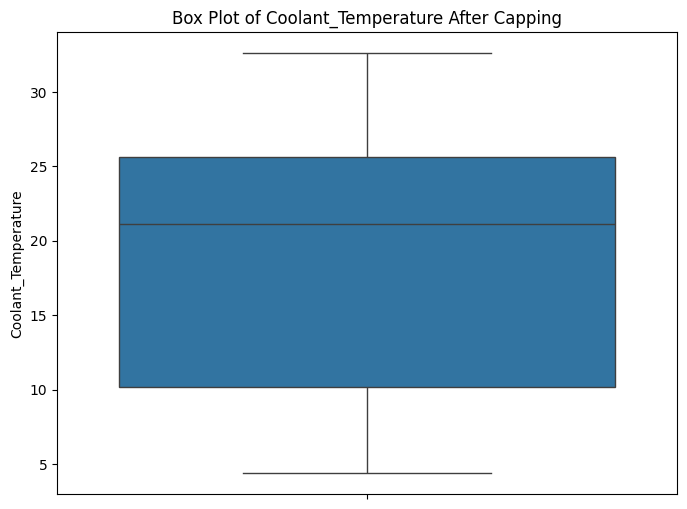

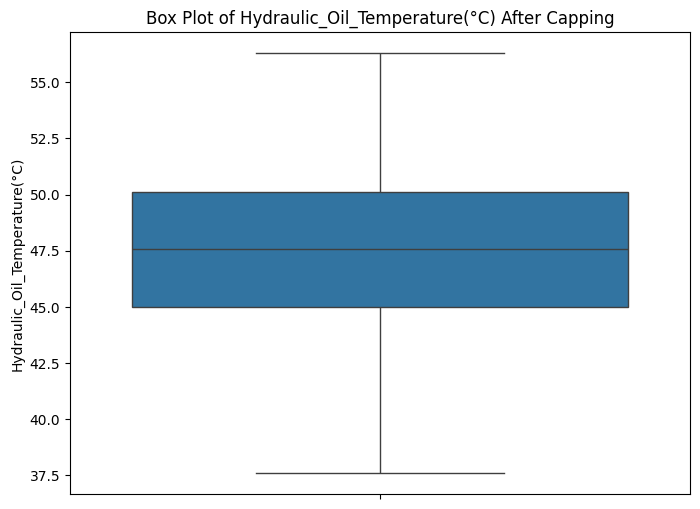

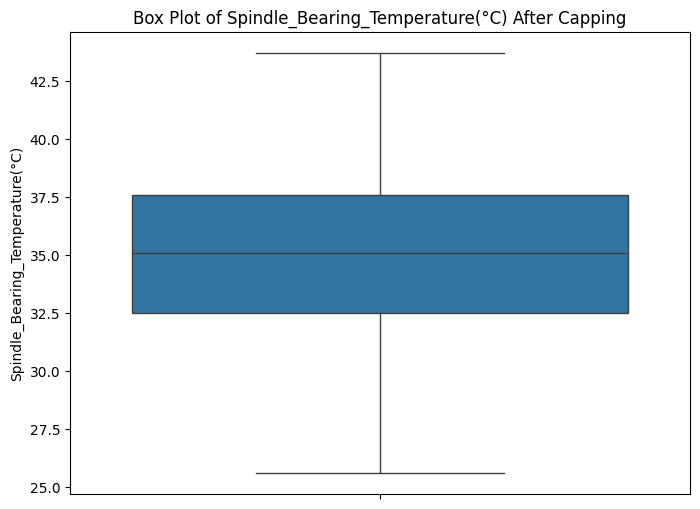

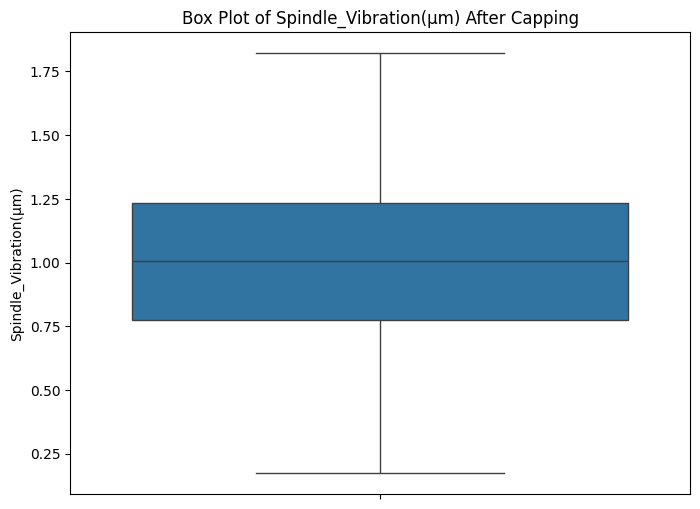

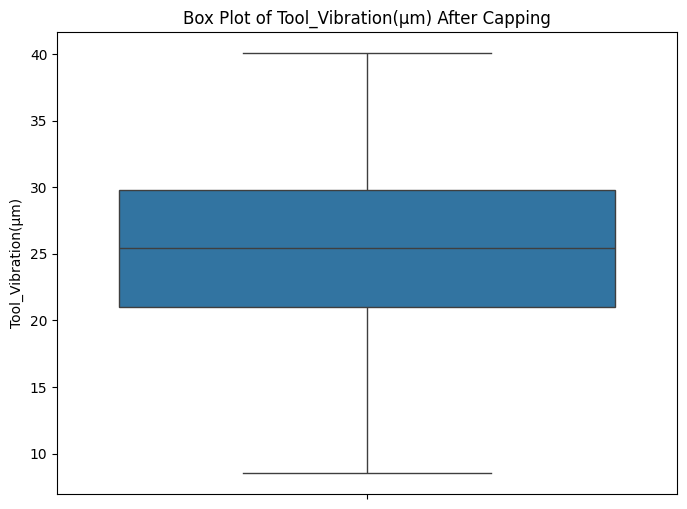

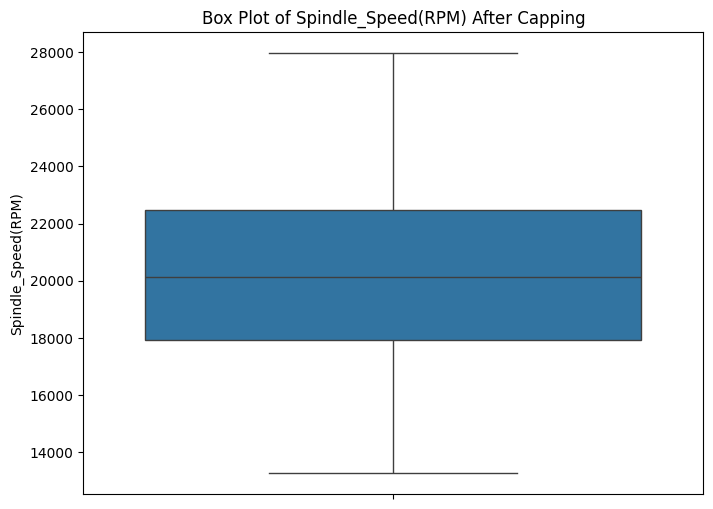

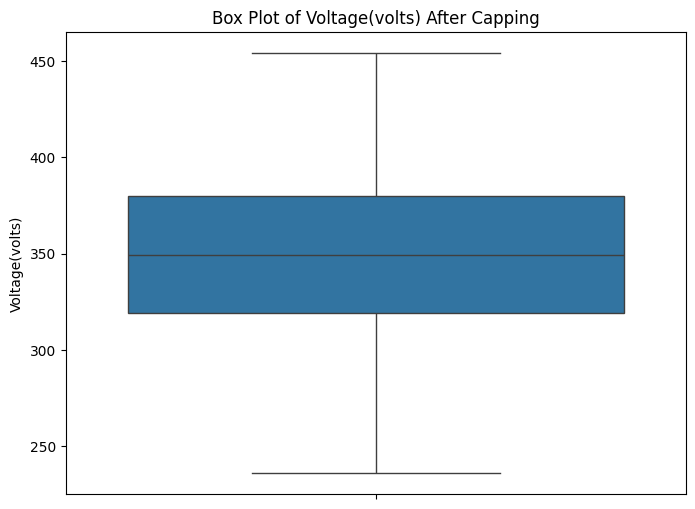

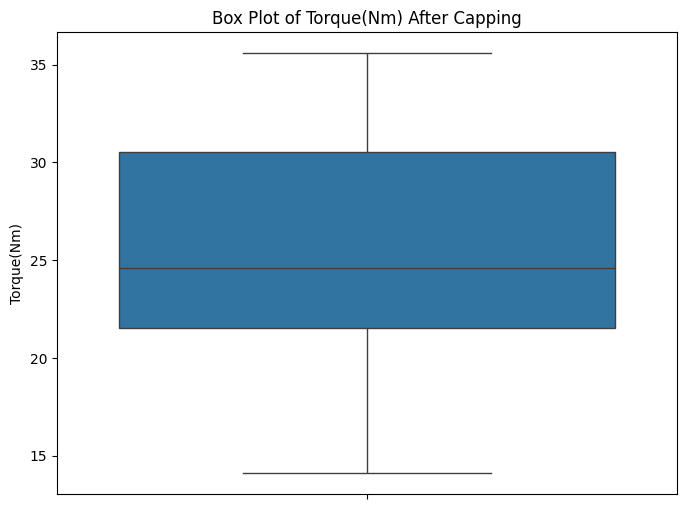

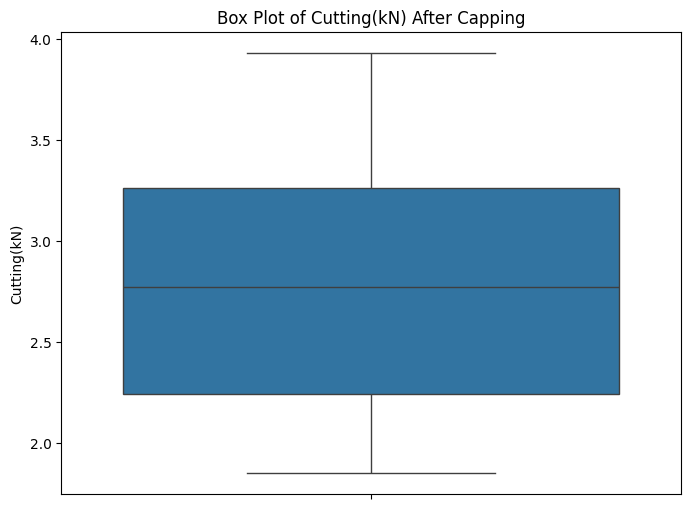

In [ ]:
# Identify columns with significant outliers based on box plots
outlier_cols = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
                'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
                'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
                'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'] # Based on visual inspection of box plots

# Apply capping at the 99th percentile for upper outliers and 1st percentile for lower outliers
for col in outlier_cols:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)
    print(f"Capped outliers in {col} at {lower_limit:.2f} and {upper_limit:.2f}")

# Re-evaluate distributions with box plots after capping
for col in outlier_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col} After Capping')
    plt.ylabel(col)
    plt.show()

## Explore relationships between variables

### Subtask:
Use correlation matrices or scatter plots to visualize the relationships between the numerical features and the 'Downtime' column (if applicable, consider how to visualize relationships with a categorical target).


**Reasoning**:
Calculate and visualize the correlation matrix for the numeric columns and then create box plots to explore the relationship between numeric features and the categorical 'Downtime' column.



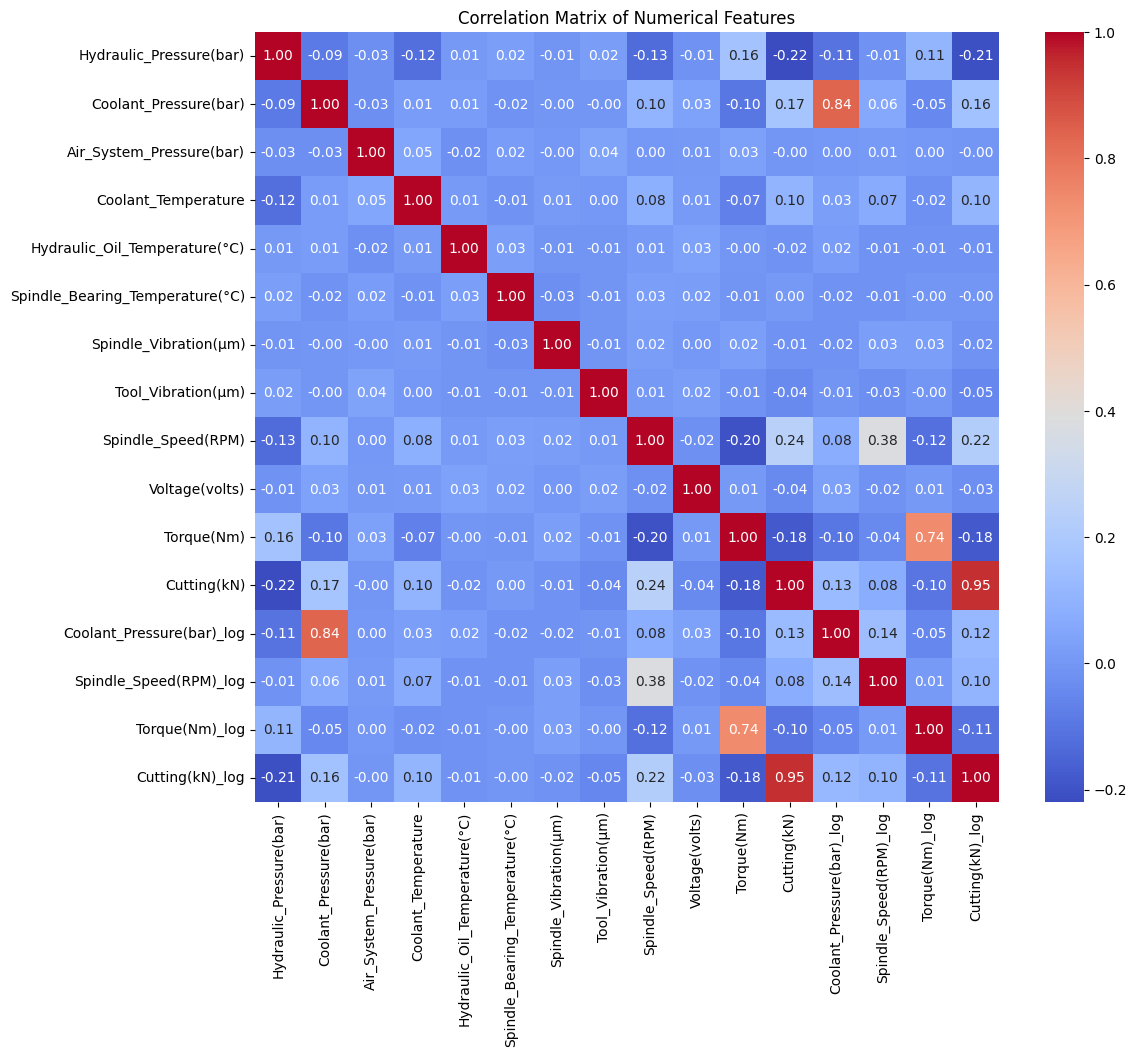

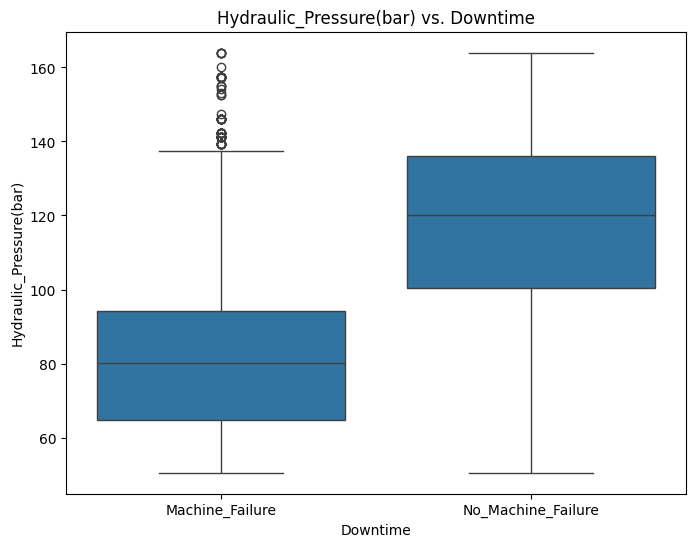

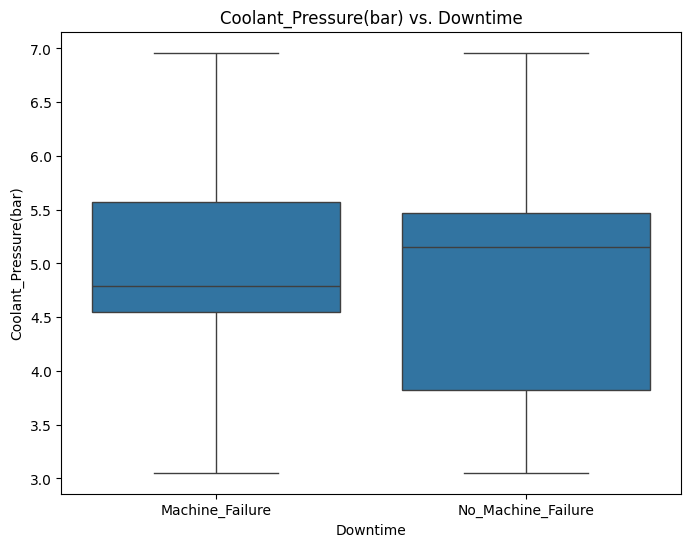

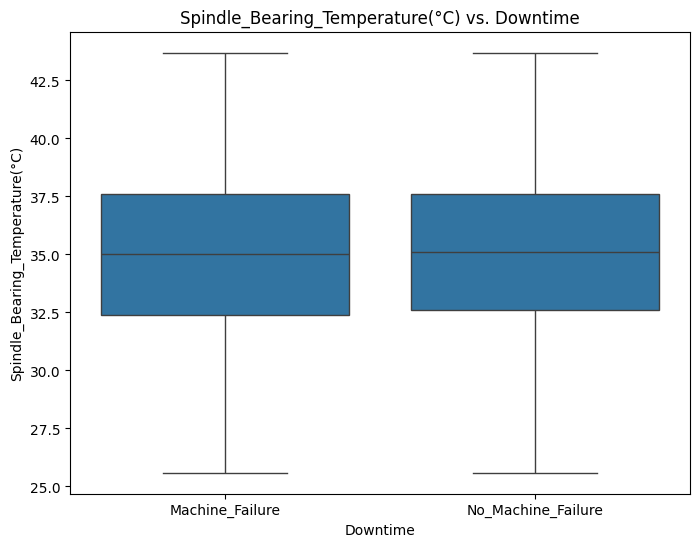

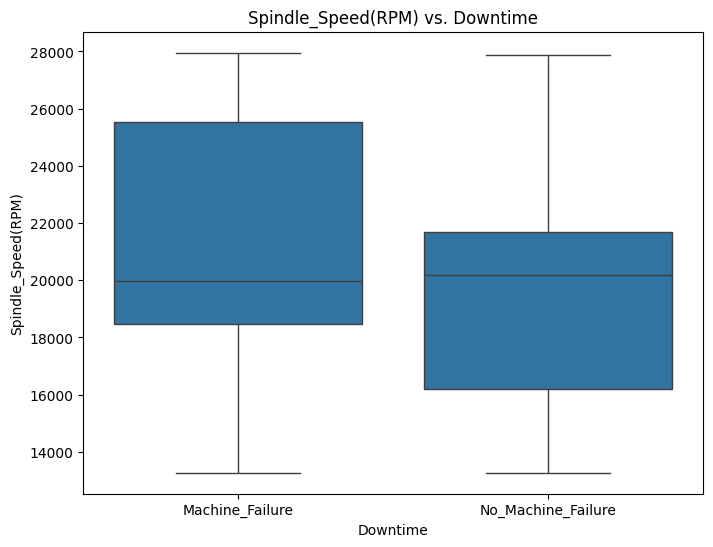

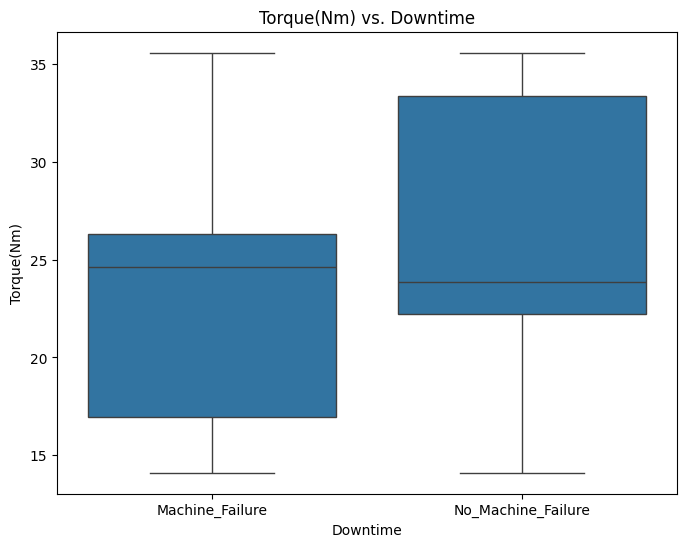

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only the numerical columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Explore relationships between numerical features and the categorical 'Downtime' column using box plots
# Choose a few numerical features based on potential relevance or correlation values
selected_numeric_cols = ['Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Spindle_Bearing_Temperature(°C)', 'Spindle_Speed(RPM)', 'Torque(Nm)']

for col in selected_numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Downtime', y=col)
    plt.title(f'{col} vs. Downtime')
    plt.xlabel('Downtime')
    plt.ylabel(col)
    plt.show()

## Analyze categorical variables

### Subtask:
Explore the distributions of the categorical columns ('Machine_ID', 'Assembly_Line_No', 'Downtime') using bar plots or count plots.


**Reasoning**:
Identify the categorical columns and iterate through them to create count plots to visualize their distributions.



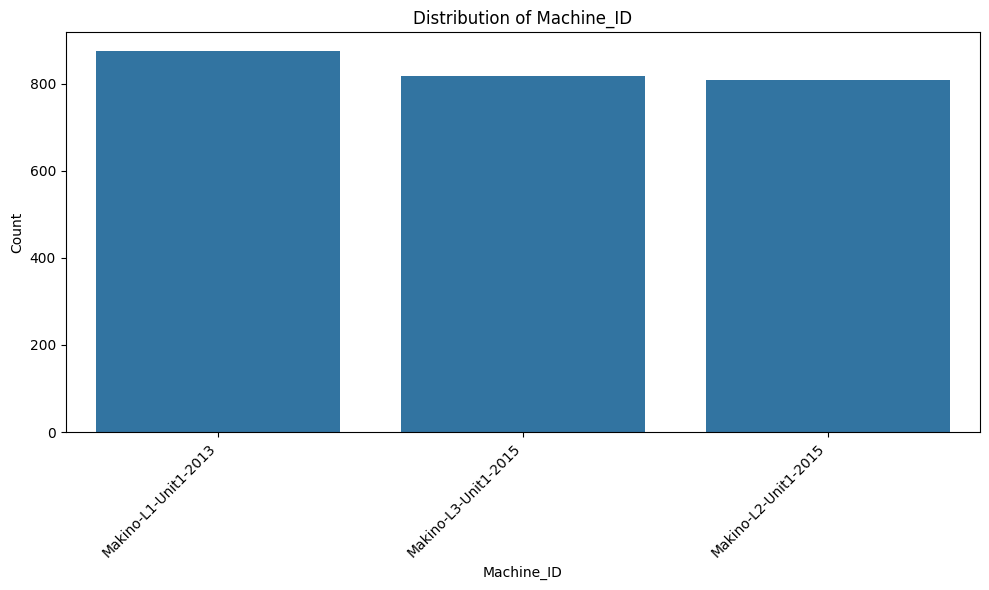

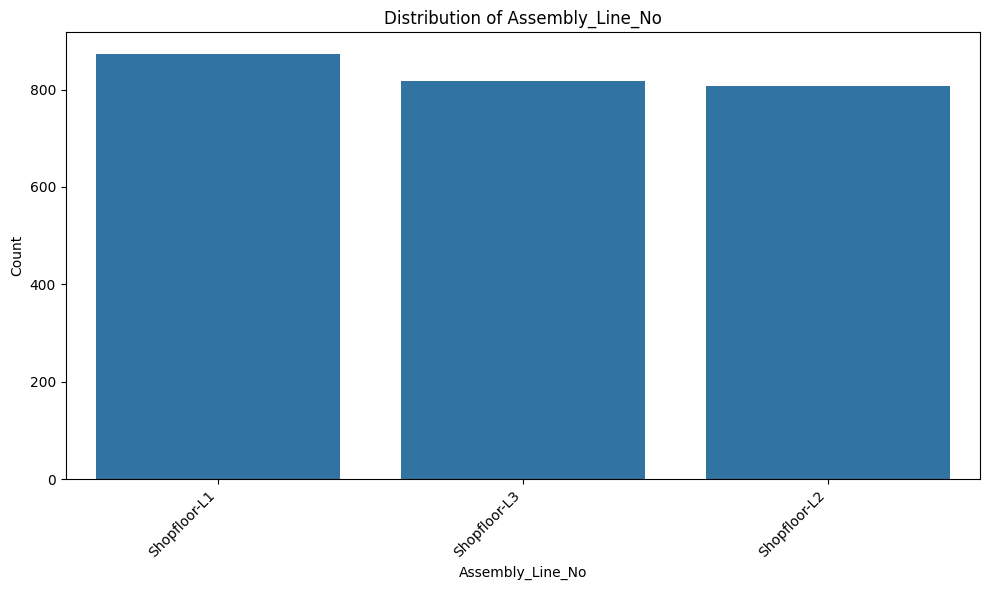

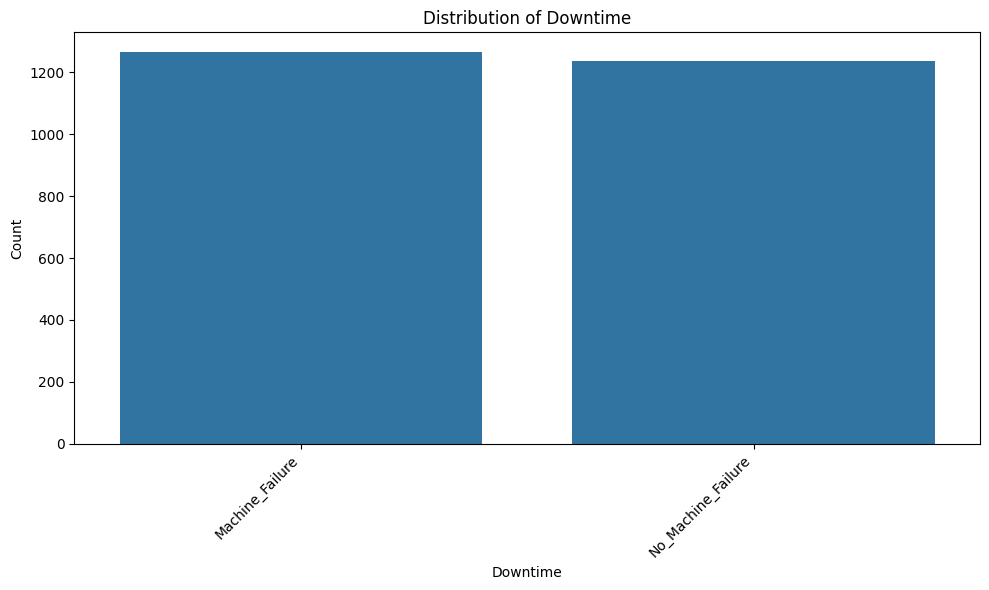

In [ ]:
# Identify the categorical columns
categorical_cols = ['Machine_ID', 'Assembly_Line_No', 'Downtime']

# Iterate through each categorical column and create a count plot
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.tight_layout() # Adjust layout
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns for the pairs plot
numeric_cols = df.select_dtypes(include=np.number).columns

# Create a pairs plot
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairs Plot of Numerical Features', y=1.02) # Add a title
plt.show()